In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import joblib
df=pd.read_csv("E:\Waddah\Alex\VS\Metho\DS Methodology Final Project\Dataset\data_without_outliers.csv")

For this project we decided to build two  models:
## 1) Random Forest Regressor
using this model first because its a strong baseline for our data, capturing non‑linear relationships between the laptop features and the price, and works well without too much hyperparameter tuning

In [3]:
df.head(1)

,Processor,Display,Video graphics,Hard drive,Storage,RAM,Display Resolution,Screen size,Screen Height,Screen Width,Display Refresh Rate,CPU,GPU,Weight,Price
0,Intel Core i9-14900HX,"15.6"" QHD (2560*1440), 165Hz DCI-P3 100% typical",Nvidia GeForce RTX 5070 8GB,1TB NVMe PCIe SSD Gen4x4,512,16,2560*1440,15.6,1440,2560,165,14900,5070,2.0,79999.0


### Selecting numeric features

Here we drop all object (string) columns to keep only numeric features for modeling.


In [4]:
obj_cols= df.select_dtypes(include=["object"]).columns
data= df.drop(columns=obj_cols)

In [5]:
data.head(1)

,Storage,RAM,Screen size,Screen Height,Screen Width,Display Refresh Rate,CPU,GPU,Weight,Price
0,512,16,15.6,1440,2560,165,14900,5070,2.0,79999.0


In [6]:
data.isnull().sum()

Storage                 0
RAM                     0
Screen size             0
Screen Height           0
Screen Width            0
Display Refresh Rate    0
CPU                     0
GPU                     0
Weight                  0
Price                   0
dtype: int64

In [7]:
data.describe()

,Storage,RAM,Screen size,Screen Height,Screen Width,Display Refresh Rate,CPU,GPU,Weight,Price
count,927.000000,927.000000,927.000000,927.000000,927.000000,927.000000,927.000000,927.000000,927.000000,927.000000
mean,762.312837,12.218986,16.952643,1162.416397,2006.686084,140.110032,7777.471413,2961.023732,4.372168,41039.393743
std,1014.136197,6.928246,6.103916,243.347487,358.314346,39.875302,4956.664713,1076.699413,50.323238,19422.120307
min,128.000000,1.000000,2.800000,768.000000,200.000000,60.000000,1005.000000,3.000000,0.000000,6499.000000
25%,512.000000,8.000000,15.600000,1080.000000,1920.000000,144.000000,1335.000000,3050.000000,1.000000,26949.000000
50%,512.000000,16.000000,15.600000,1080.000000,1920.000000,144.000000,8290.000000,3060.000000,2.000000,37999.000000
75%,512.000000,16.000000,15.600000,1200.000000,1920.000000,144.000000,12650.000000,3060.000000,2.000000,50999.000000
max,7200.000000,64.000000,40.900000,2560.000000,3840.000000,360.000000,14900.000000,6700.000000,891.000000,102000.000000


### Splitting features and target

Here we set `Price` as the target variable `y` and the remaining numeric columns as the feature matrix `x`.


In [8]:
y= data.Price
x= data.drop(columns=["Price"])


In [9]:
x.head(1)

,Storage,RAM,Screen size,Screen Height,Screen Width,Display Refresh Rate,CPU,GPU,Weight
0,512,16,15.6,1440,2560,165,14900,5070,2.0


#### Here we split the data into training and testing sets to evaluate the model on unseen data.

In [10]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=10)

#### Initializing model by creating a Random Forest Regressor with 100 trees and a fixed random state for reproducibility.

In [11]:
model1= RandomForestRegressor(n_estimators=100,random_state=0)

#### Training and Predecting

In [12]:
model1.fit(x_train,y_train)
y_pred= model1.predict(x_test)


#### Calculating Model's Mae and r2 score

In [ ]:
mae= mean_absolute_error(y_test,y_pred)
r_2= r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"R2 Score: {r_2}")

Mean Absolute Error: 6146.642984532345
R2 Score: 0.7769237188929221


### Mean Absolute Percentage Error

In [21]:
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"Average Error Percentage: {mape:.2f}%")

Average Error Percentage: 17.89%


### Actual vs Predicted Prices

##### Plot compares the actual laptop prices with the prices predicted and showing correlation value.






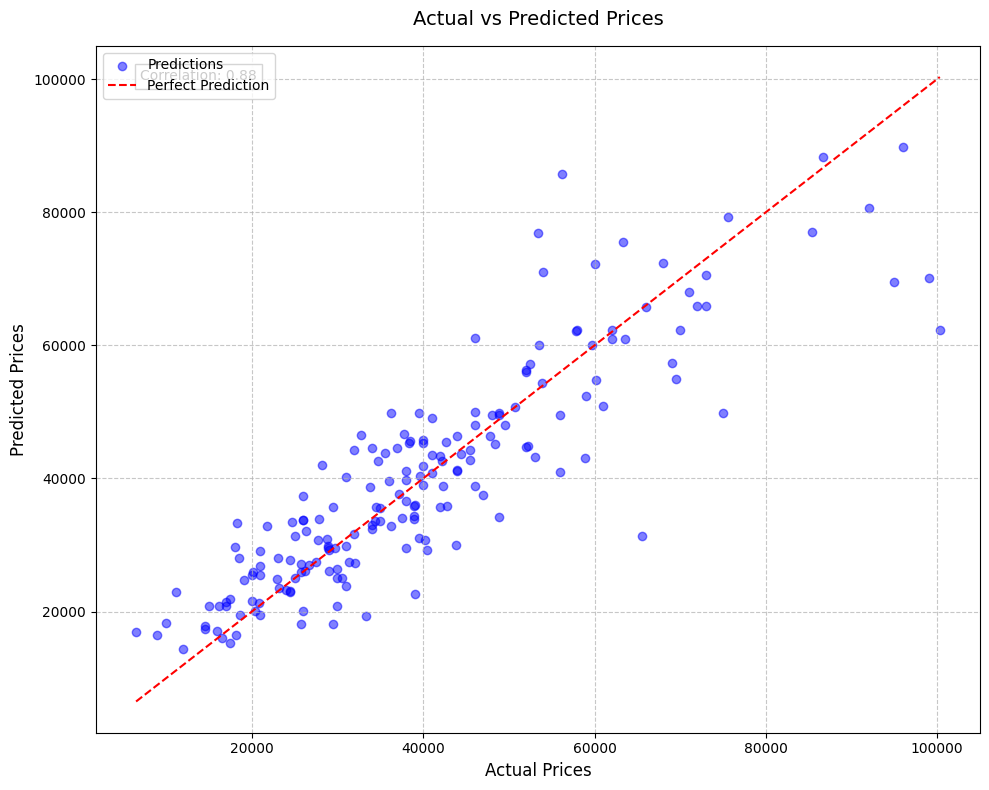

In [22]:
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predictions')

min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Prediction')

plt.xlabel('Actual Prices', fontsize=12)
plt.ylabel('Predicted Prices', fontsize=12)
plt.title('Actual vs Predicted Prices', fontsize=14, pad=15)

plt.grid(True, linestyle='--', alpha=0.7)

plt.legend(fontsize=10)

correlation = np.corrcoef(y_test, y_pred)[0,1]
plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}', 
        transform=plt.gca().transAxes, fontsize=10,
        bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

#### Visualizes the distribution of prediction errors

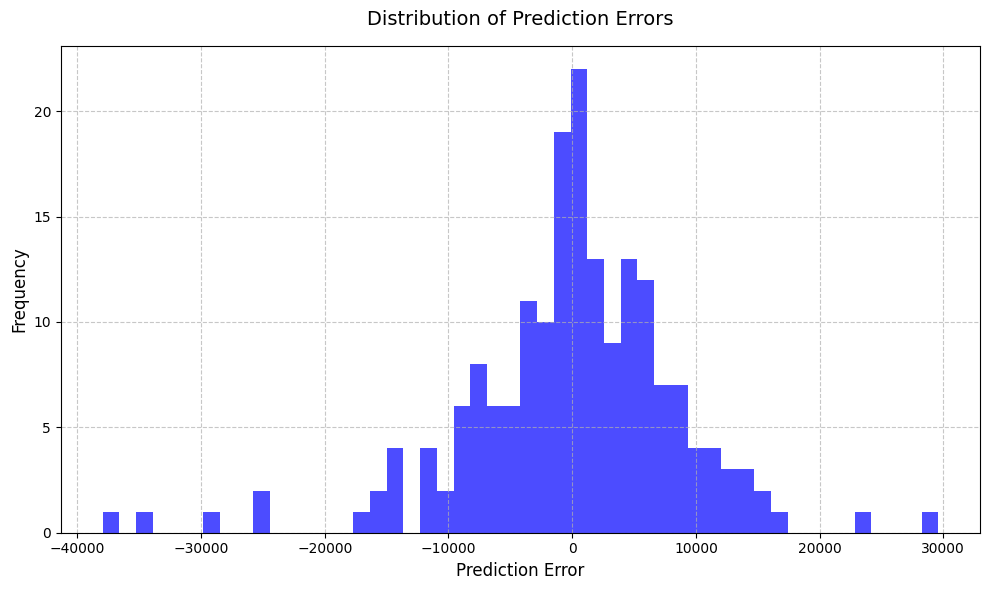

In [16]:
plt.figure(figsize=(10, 6))
errors = y_pred - y_test
plt.hist(errors, bins=50, color='blue', alpha=0.7)
plt.xlabel('Prediction Error', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Prediction Errors', fontsize=14, pad=15)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### saving the model

In [90]:
joblib.dump(model1, "Random_Forest_Model.joblib")

['Random_Forest_Model.joblib']

### 2) XGBoost Regressor 

more advanced gradient boosting algorithm that gives better accuracy than on structured data

In [23]:
from xgboost import XGBRegressor

In [24]:
model2 = XGBRegressor(n_estimators=250, learning_rate=0.05, n_jobs=8)

In [25]:
model2.fit(x_train, y_train)
pred= model2.predict(x_test)


In [26]:
score= mean_absolute_error(y_test, pred)
r_2_score= r2_score(y_test, pred)
print(f"Mean Absolute Error: {score}")
print(f"R2 Score: {r_2_score}")

Mean Absolute Error: 6049.328650033603
R2 Score: 0.7813296330779536


In [27]:
mape_2 = np.mean(np.abs((y_test - pred) / y_test)) * 100
print(f"Average Error Percentage: {mape_2:.2f}%")

Average Error Percentage: 17.91%


In [28]:
joblib.dump(model2, "XGBoost_Model.joblib")

['XGBoost_Model.joblib']

In [29]:
mae_rf = mean_absolute_error(y_test, y_pred)
mae_xgb = mean_absolute_error(y_test, pred)

r2_rf = r2_score(y_test, y_pred)
r2_xgb = r2_score(y_test, pred)

#### Comparing the MAE for our 2 models

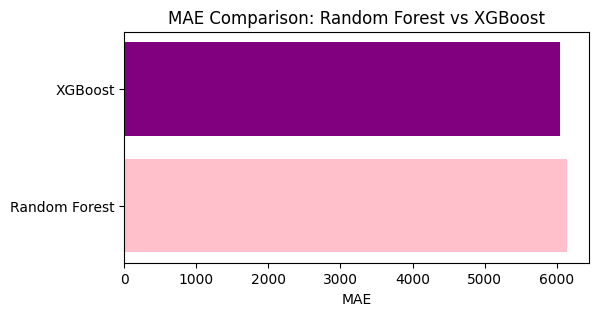

In [35]:
plt.figure(figsize=(6, 3))
models = ['Random Forest', 'XGBoost']
mae_values = [mae_rf, mae_xgb]
plt.barh(models, mae_values, color=['pink', 'purple'])
plt.xlabel('MAE')
plt.title('MAE Comparison: Random Forest vs XGBoost')
plt.show()

#### Comparing the R2 Score for our 2 models

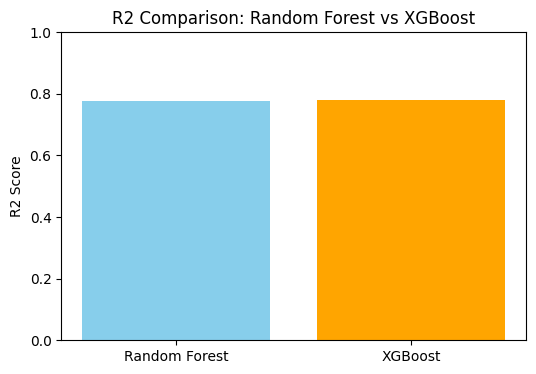

In [42]:
plt.figure(figsize=(6, 4))
r2_values = [r2_rf, r2_xgb]
plt.bar(models, r2_values, color=['skyblue', 'orange'])
plt.ylabel('R2 Score')
plt.title('R2 Comparison: Random Forest vs XGBoost')
plt.ylim(0, 1)
plt.show()

### Conclusion

From the last two charts, we can see that Random Forest and XGBoost have very similar MAE and R2 scores, which means both models perform almost the same on this dataset